 # Evaluation du modèle sur l'ensemble de test et envoi du résultat final

In [9]:
from pandas import DataFrame, read_csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from bigml.api import BigML
api = BigML(project="project/5d94a42042129f2b0500005c")

 ## Création de la source et dataset correspondant du fichier test

In [ ]:
source2_args = {"name": "171007 test ipnb",
     "source_parser": {"missing_tokens": ["NULL"]}}
source2 = api.create_source('test_mod.csv', source2_args)

dataset2_args = {"name": "171007 ipnb test"}
dataset2 = api.create_dataset(source2, dataset2_args)

In [7]:
dataset2 = api.get_dataset('dataset/5db162dee476847468009156')

## Génération de la prédiction sur test

In [ ]:
prediction_args = {"name": "171007 ipnb - Train (80%) - Prediction",
                  "header": True,
                  "probabilities": True,
                  "output_fields": ["field1"]}

batch_prediction = api.create_batch_prediction(model, dataset2, prediction_args)

In [ ]:
api.ok(batch_prediction)

In [ ]:
api.download_batch_prediction(batch_prediction,
                              filename= "171007 ipnb 80% - test prediction.csv")

## Importation du fichier généré à l'étape précédente

In [4]:
df3 = read_csv('171007 ipnb 80% - test prediction.csv')
df3

,field1,SeriousDlqin2yrs,0 probability,1 probability
0,0,0,0.94218,0.05782
1,1,0,0.95594,0.04406
2,2,0,0.98942,0.01058
3,3,0,0.95748,0.04252
4,4,0,0.91365,0.08635
...,...,...,...,...
101498,101498,0,0.97996,0.02004
101499,101499,0,0.60409,0.39591
101500,101500,0,0.99691,0.00309
101501,101501,0,0.90697,0.09303


## Mise au format attendu par kaggle (2 colonnes)

In [5]:
df3.drop(df3.columns[1:3], axis=1, inplace=True)
df3.rename(columns={"field1": "Id", "1 probability": "Probability"}, inplace=True)
df3

,Id,Probability
0,0,0.05782
1,1,0.04406
2,2,0.01058
3,3,0.04252
4,4,0.08635
...,...,...
101498,101498,0.02004
101499,101499,0.39591
101500,101500,0.00309
101501,101501,0.09303


In [6]:
df3[['Id']] = df3[['Id']] + 1
df3

,Id,Probability
0,1,0.05782
1,2,0.04406
2,3,0.01058
3,4,0.04252
4,5,0.08635
...,...,...
101498,101499,0.02004
101499,101500,0.39591
101500,101501,0.00309
101501,101502,0.09303


## Visualisation du résultat de probabilité

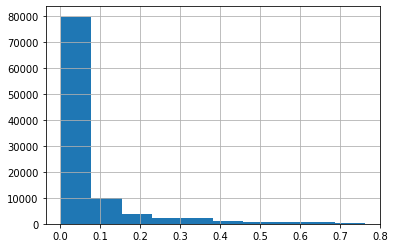

In [12]:
df3['Probability'].hist();

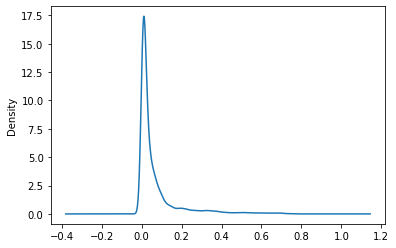

In [13]:
df3['Probability'].plot(kind='density', subplots=True, sharex=False, sharey=False);

## Exportation du fichier de résultat

In [40]:
df3.to_csv('171001 ipnb for kag.csv', index=False)

## Envoi du fichier final

In [9]:
import kaggle

In [2]:
submission_file = "171001 ipnb for kag.csv"
kaggle.api.competition_submit(submission_file, "171001 ipnb ensemble", "GiveMeSomeCredit")

100%|██████████| 1.64M/1.64M [00:06<00:00, 271kB/s] 


Successfully submitted to Give Me Some Credit

## Récupération du score

In [12]:
kaggle.api.competitions_submissions_list("GiveMeSomeCredit")

[{'ref': 12977370,
  'totalBytes': 1720383,
  'date': '2019-10-24T09:22:42.343Z',
  'description': '171001 ipnb ensemble',
  'errorDescription': None,
  'fileName': '171001 ipnb for kag.csv',
  'publicScore': '0.85508',
  'privateScore': '0.86239',
  'status': 'complete',
  'submittedBy': 'laurent33',
  'submittedByRef': 'laurent33',
  'teamName': 'laurent33',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/12977370/12977370.raw'},
 {'ref': 12715144,
  'totalBytes': 403828,
  'date': '2019-10-04T15:01:55.733Z',
  'description': 'vb OptiML 2',
  'errorDescription': None,
  'fileName': 'VB OPTIML 2 Clean.zip',
  'publicScore': '0.86000',
  'privateScore': '0.86576',
  'status': 'complete',
  'submittedBy': 'laurent33',
  'submittedByRef': 'laurent33',
  'teamName': 'laurent33',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/12715144/12715144.raw'},
 {'ref': 12714865,
  'totalBytes': 400610,
  'date': '2019-10-04T14:29:41.37Z',
  'description': 'M6 v